# Proyecto final


- Juan Carlos García #12002028
- Alejandra Rodas #18013406

## 1. Entorno de Anaconda

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

## 2. Separación de datos (con NumPy)

In [134]:
data = np.load('./../proyecto_training_data.npy')

In [135]:
dataset = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataset

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [136]:
def randomSlice( data, percentage ):
    data2 = data[data.index.isin( [1,2,3,4,5,6,7,8,9,10] )]
    dataLen = int(data2.shape[0] * percentage)
    indexes = list(range(0, dataLen))
    print(sample([x for x in indexes], int(dataLen * percentage)))
    # print(data.iloc[0, 0: ].tolist())

    
dataLen = dataset.shape[0]
print(dataLen , " - 100%")
print(dataLen * 0.8 , " - 80%")
print(dataLen * 0.20 , " - 20%")



dataTraining = dataset.iloc[0: int(dataLen * 0.80)]
print(dataTraining)

dataTest = dataset.iloc[int(dataLen * 0.80): dataLen]
print(dataTest)


1460  - 100%
1168.0  - 80%
292.0  - 20%
      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]
      SaleP

## 3. Exploración de datos

In [137]:
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [138]:
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

In [139]:
dataset.shape
#(filas, columnas)

(1460, 6)

In [140]:
#variables dataset

describeall = dataset.describe()

print(describeall)


print('')

print('Rango')
print((describe.loc['max'] - describe.loc['min']))


           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count  1201.000000  
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max     313.000000  

Rango
SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt 

In [141]:
#variables dataTraining

describe = dataTraining.describe()

print(describe)


print('')

print('Rango')
print((describe.loc['max'] - describe.loc['min']))


           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1168.000000  1168.000000  1168.000000   1168.000000  1168.000000   
mean   180590.277397     6.101027  1156.323630      6.485445  1971.451199   
std     78815.697902     1.378025   373.780374      1.609141    29.951707   
min     34900.000000     1.000000   334.000000      2.000000  1875.000000   
25%    129900.000000     5.000000   882.000000      5.000000  1954.000000   
50%    162950.000000     6.000000  1086.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1390.250000      7.000000  2000.000000   
max    755000.000000    10.000000  3228.000000     14.000000  2010.000000   

       LotFrontage  
count   962.000000  
mean     69.946985  
std      23.478161  
min      21.000000  
25%      59.000000  
50%      70.000000  
75%      80.000000  
max     313.000000  

Rango
SalePrice       720100.0
OverallQual          9.0
1stFlrSF          2894.0
TotRmsAbvGrd        12.0
YearBuilt 

## 4. Histogramas para graficar variables (con Seaborn)

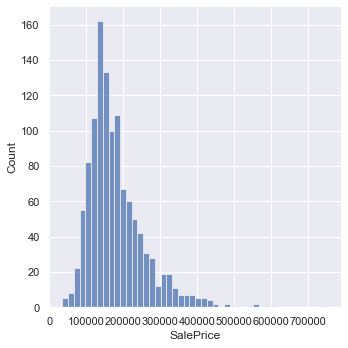

In [142]:
sns.displot(dataTraining.SalePrice)

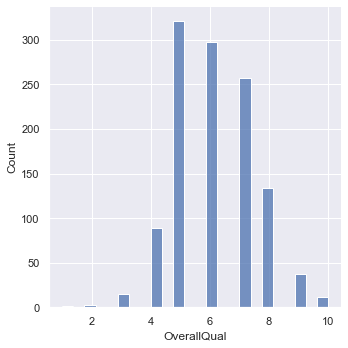

In [146]:
sns.displot(dataTraining.OverallQual)

In [147]:
sns.displot(dataTraining.1stFlrSF)

SyntaxError: invalid syntax (<ipython-input-147-7f606505e9e6>, line 1)

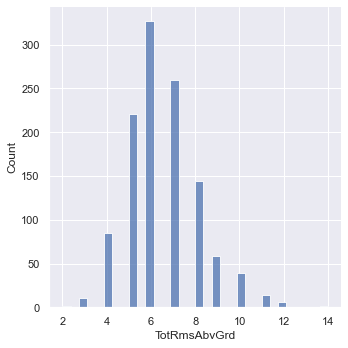

In [150]:
sns.displot(dataTraining.TotRmsAbvGrd)

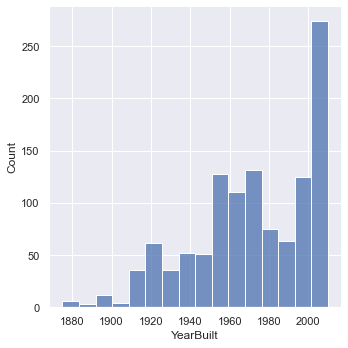

In [152]:
sns.displot(dataTraining.YearBuilt)

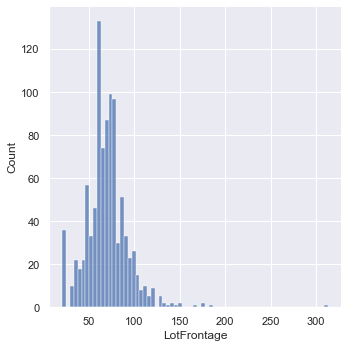

In [151]:
sns.displot(dataTraining.LotFrontage)

## 5. Cálculos y gráfica de cada variable independiente x

In [157]:
x_simple = np.array([-2, -1, 0, 1, 2])
y_simple = np.array([4, 1, 3, 2, 0])
coef = np.corrcoef(x_simple, y_simple)

print(coef)

[[ 1.  -0.7]
 [-0.7  1. ]]


In [205]:
#correlacion entre variables

#SalePrice vs. OverallQual 
np.corrcoef(dTraining[:,1],dTraining[:,0])[1,0]

0.7939900504626405

<function matplotlib.pyplot.show(close=None, block=None)>

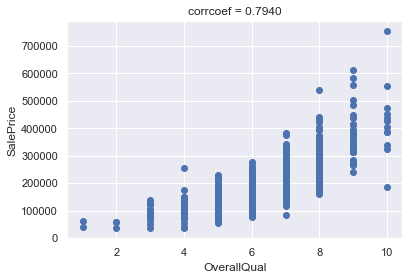

In [216]:
plt.scatter(dataTraining['OverallQual'], dataTraining['SalePrice'])
plt.title("corrcoef = 0.7940")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show

In [207]:
#SalePrice vs. 1stFlrSF 
np.corrcoef(dTraining[:,2],dTraining[:,0])[1,0]

0.6162887000998717

<function matplotlib.pyplot.show(close=None, block=None)>

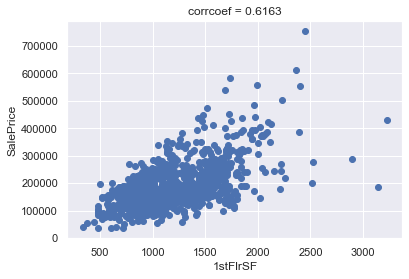

In [209]:
plt.scatter(dataTraining['1stFlrSF'], dataTraining['SalePrice'])
plt.title("corrcoef = 0.6163")
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show

In [211]:
#SalePrice vs. TotRmsAbvGrd 
np.corrcoef(dTraining[:,3],dTraining[:,0])[1,0]

0.5647069399593065

<function matplotlib.pyplot.show(close=None, block=None)>

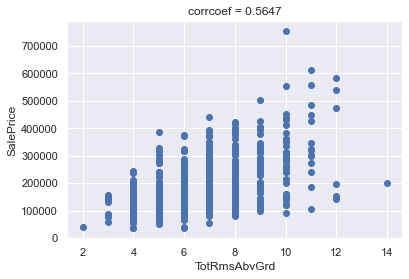

In [212]:
plt.scatter(dataTraining['TotRmsAbvGrd'], dataTraining['SalePrice'])
plt.title("corrcoef = 0.5647")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show

In [183]:
#SalePrice vs. YearBuilt 
np.corrcoef(dTraining[:,4],dTraining[:,0])[1,0]

0.5341706927117515

<function matplotlib.pyplot.show(close=None, block=None)>

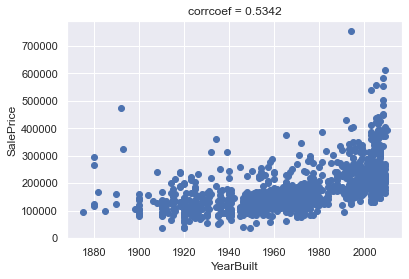

In [213]:
plt.scatter(dataTraining['YearBuilt'], dataTraining['SalePrice'])
plt.title("corrcoef = 0.5342")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show

In [184]:
#SalePrice vs. LotFrontage 
np.corrcoef(dTraining[:,5],dTraining[:,0])[1,0]

nan

<function matplotlib.pyplot.show(close=None, block=None)>

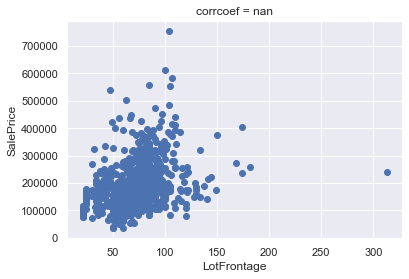

In [215]:
plt.scatter(dataTraining['LotFrontage'], dataTraining['SalePrice'])
plt.title("corrcoef = nan")
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.show

In [ ]:
# variables elegidas: 
1: OverallQual con corrcoef = 0.7940
2: 1stFlrSF con corrcoef = 0.6163

## 6. Función para entrenar modelo de regresión lineal de una variable y = β0 + β1 ∗ x

In [268]:
# parametros

x = dataTraining['OverallQual'].values
y = dataTraining['SalePrice'].values
learning_rate = 0.01
epoch = 10000
b0 = 0
b1 = 0
n = len(x)

for i in range(epoch):
    yhat = b0 + b1 * x
    gradb1 = 1/n*np.sum((yhat - y) * x)
    gradb0 = 1/n*np.sum((yhat - y))
    b0 = b0 - learning_rate*gradb0
    b1 = b1 - learning_rate*gradb1

print('b0: {}, b1: {}'.format(b0, b1))

b0: -95582.46486131243, b1: 45273.480418871615


In [255]:
x = dataTraining['OverallQual'].values.reshape(-1,1)
y = dataTraining['SalePrice'].values.reshape(-1,1)

In [226]:
dataTrain, dataTest, dataTrain_Sales, dataTest_Sales = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=123)

In [227]:
lm1 = LinearRegression()
lm1.fit(dataTrain, dataTrain_Sales)

LinearRegression()

In [230]:
# β1
lm1.coef_

array([[44991.37057353]])

In [231]:
# β0

lm1.intercept_

array([-95594.1953882])

<function matplotlib.pyplot.show(close=None, block=None)>

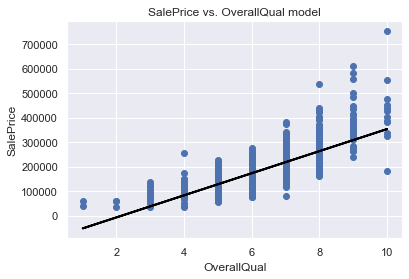

In [242]:
# modelo

y_predict_from_train = lm1.predict(dataTrain)
y_predict_from_train

plt.scatter(dataTraining['OverallQual'], dataTraining['SalePrice'])
plt.plot(dataTrain, y_predict_from_train, color="black", linewidth=2)
plt.title("SalePrice vs. OverallQual model")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show

In [241]:
# error

lm1.score(dataTrain, dataTrain_Sales)

0.6314007722928174

In [246]:
# rmse

y_predicts_test = lm1.predict(dataTest)
rmse = math.sqrt(metrics.mean_squared_error(dataTest_Sales, y_predicts_test))
rmse

50526.68210610892

In [257]:
yhat

array([0., 0., 0., ..., 0., 0., 0.])